In [1]:
from obspy import read
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt

In [2]:
"""Download waveforms and write into a file"""

"""Let's obtain the online data first and write it into a file"""
client = Client(
    "IRIS"
)  #"IRIS" as the client (you can change according to your needs)

"""define the details of an arbitrarily selected station"""
net = "II"  # network of the station
sta = "KDAK"  # station code
loc = "00"  # to specify the instrument at the station
chan = "BH*"


* Downloading the data for 2020-10-19 [Mww7.6 South Of Alaska earthquake](https://ds.iris.edu/wilber3/find_stations/11327190)

In [3]:
# uses Obspy definition of datetime (not the Python datetime but the functionality is similar)
eventTime = UTCDateTime("2020-10-19T20:54:39")
starttime = eventTime - 60  # 1 minute before the event
endtime = eventTime + 5 * 60  # 5 minutes after the event

In [4]:
"""Download waveform data and store it into a stream object"""
myStream = client.get_waveforms(net, sta, loc, chan, starttime, endtime, attach_response = True)
print(myStream)

"""write the stream to a file"""
myStream.write("myStream-allcomp.mseed", format="MSEED")

3 Trace(s) in Stream:
II.KDAK.00.BH1 | 2020-10-19T20:53:39.019539Z - 2020-10-19T20:59:38.994539Z | 40.0 Hz, 14400 samples
II.KDAK.00.BH2 | 2020-10-19T20:53:39.019539Z - 2020-10-19T20:59:38.994539Z | 40.0 Hz, 14400 samples
II.KDAK.00.BHZ | 2020-10-19T20:53:39.019539Z - 2020-10-19T20:59:38.994539Z | 40.0 Hz, 14400 samples


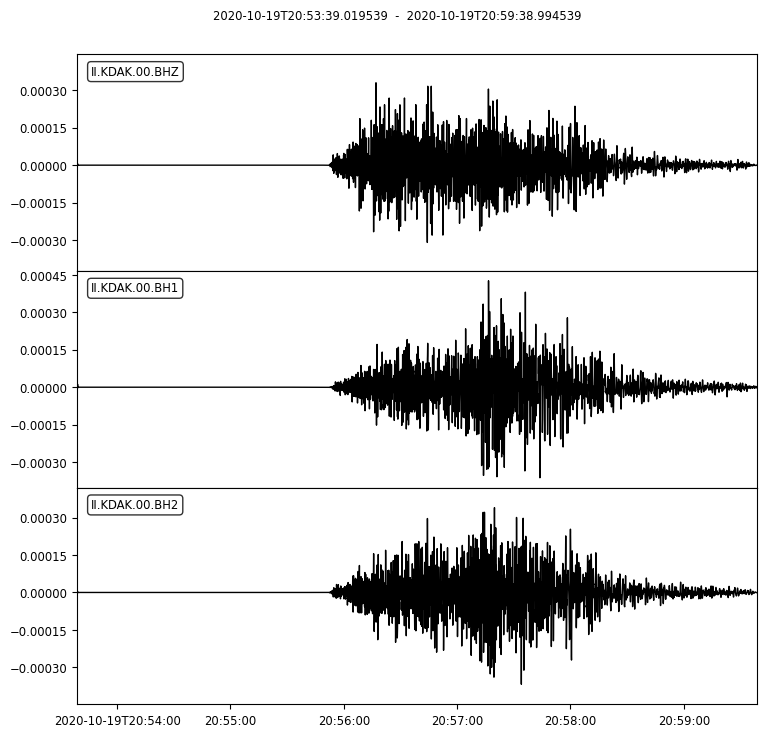

3 Trace(s) in Stream:
II.KDAK.00.BH1 | 2020-10-19T20:53:39.019539Z - 2020-10-19T20:59:38.994539Z | 40.0 Hz, 14400 samples
II.KDAK.00.BH2 | 2020-10-19T20:53:39.019539Z - 2020-10-19T20:59:38.994539Z | 40.0 Hz, 14400 samples
II.KDAK.00.BHZ | 2020-10-19T20:53:39.019539Z - 2020-10-19T20:59:38.994539Z | 40.0 Hz, 14400 samples


In [5]:
st_copy = myStream.copy()
st_copy.remove_response(output="VEL")

# Filtering with a lowpass on a copy of the original Trace

st_copy.filter('bandpass', freqmin=1.0, freqmax=7.0, corners=2, zerophase=True)
#st_copy.filter('highpass', freq=5.0, corners=2, zerophase=True)
st_copy.plot()
print(st_copy)

st_copy[0].write("Waveform.BHE",format="SAC")
st_copy[1].write("Waveform.BHN",format="SAC")
st_copy[2].write("Waveform.BHZ",format="SAC")

In [6]:
# Mark P- and S-wave first arrival
from obspy import read
import matplotlib.pyplot as plt
import numpy as np
from obspy.taup import TauPyModel
import os
from obspy.clients.iris import Client
client = Client()
model = TauPyModel(model="iasp91")

st = read("./Waveform.BHE")
st += read("./Waveform.BHN")
st += read("./Waveform.BHZ")
print(st)

sachd = st[0].stats.sac 
print(sachd)

#distaz = client.distaz(sachd["stla"], sachd["stlo"], sachd["evla"], sachd["evlo"])
distaz = client.distaz(57.78, -152.58, 54.6093, -159.6519)
gcarc = distaz['distance']
print(gcarc)
arrival_P = model.get_travel_times(source_depth_in_km=31.08, distance_in_degree=gcarc, phase_list=["P"])
arrival_S = model.get_travel_times(source_depth_in_km=31.08, distance_in_degree=gcarc, phase_list=["S"])

sachd["t1"] = arrival_P[0].time + sachd["b"] - 20
sachd["kt1"] = arrival_P[0].name
sachd["t2"] = arrival_S[0].time + sachd["b"] - 20
sachd["kt2"] = arrival_S[0].name


st[0].write("Waveform.BHE",format="SAC")
st[1].write("Waveform.BHN",format="SAC")
st[2].write("Waveform.BHZ",format="SAC")

3 Trace(s) in Stream:
II.KDAK.00.BH1 | 2020-10-19T20:53:39.019539Z - 2020-10-19T20:59:38.994539Z | 40.0 Hz, 14400 samples
II.KDAK.00.BH2 | 2020-10-19T20:53:39.019539Z - 2020-10-19T20:59:38.994539Z | 40.0 Hz, 14400 samples
II.KDAK.00.BHZ | 2020-10-19T20:53:39.019539Z - 2020-10-19T20:59:38.994539Z | 40.0 Hz, 14400 samples
AttribDict({'delta': 0.025, 'depmin': -0.0003626525, 'depmax': 0.0004261517, 'scale': 1.0, 'b': 0.00053899997, 'e': 359.97556, 'depmen': 3.7872994e-09, 'nzyear': 2020, 'nzjday': 293, 'nzhour': 20, 'nzmin': 53, 'nzsec': 39, 'nzmsec': 19, 'nvhdr': 6, 'npts': 14400, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 0, 'kstnm': 'KDAK', 'khole': '00', 'kcmpnm': 'BH1', 'knetwk': 'II'})
5.06163


3 Trace(s) in Stream:
II.KDAK.00.BH1 | 2020-10-19T20:53:39.019539Z - 2020-10-19T20:59:38.994539Z | 40.0 Hz, 14400 samples
II.KDAK.00.BH2 | 2020-10-19T20:53:39.019539Z - 2020-10-19T20:59:38.994539Z | 40.0 Hz, 14400 samples
II.KDAK.00.BHZ | 2020-10-19T20:53:39.019539Z - 2020-10-19T20:59:38.994539Z | 40.0 Hz, 14400 samples


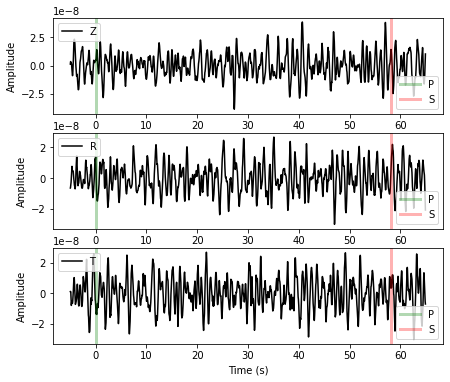

In [9]:
# Plot the waveform
from obspy import read
import matplotlib.pyplot as plt
import numpy as np

st = read("./Waveform.BHE")
st += read("./Waveform.BHN")
st += read("./Waveform.BHZ")
print(st)

tb = st[0].stats.sac.b
tp = st[0].stats.sac.t1
ts = st[0].stats.sac.t2
delta = st[0].stats.sac.delta
npts = int(70/delta)
bpoint = int((tp-5-tb)/delta)
time = np.arange(tp-5,tp-5+npts*delta,delta)

plt.subplots(figsize=(7, 6))
plt.subplot(3, 1, 1)
line1, = plt.plot(time-tp,st[0].data[bpoint:bpoint+npts], '-k', label="Z")
plt.ylabel('Amplitude')
plt.legend(loc="upper left")
first_legend = plt.legend(handles=[line1], loc='upper left')
plt.gca().add_artist(first_legend)

## Phase arrivals
line2 = plt.axvline(x=0, color='green', linewidth=3, alpha=0.3, label="P")
line3 = plt.axvline(x=ts-tp, color='red', linewidth=3, alpha=0.3, label="S")
plt.legend(handles=[line2,line3], loc='lower right')

plt.subplot(3, 1, 2)
line1, = plt.plot(time-tp,st[1].data[bpoint:bpoint+npts], '-k', label="R")
plt.ylabel('Amplitude')
plt.legend(loc="upper left")
first_legend = plt.legend(handles=[line1], loc='upper left')
plt.gca().add_artist(first_legend)

## Phase arrivals
line2 = plt.axvline(x=0, color='green', linewidth=3, alpha=0.3, label="P")
line3 = plt.axvline(x=ts-tp, color='red', linewidth=3, alpha=0.3, label="S")
plt.legend(handles=[line2,line3], loc='lower right')

plt.subplot(3, 1, 3)
line1, = plt.plot(time-tp,st[2].data[bpoint:bpoint+npts], '-k', label="T")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
first_legend = plt.legend(handles=[line1], loc='upper left')
plt.gca().add_artist(first_legend)
## Phase arrivals
line2 = plt.axvline(x=0, color='green', linewidth=3, alpha=0.3, label="P")
line3 = plt.axvline(x=ts-tp, color='red', linewidth=3, alpha=0.3, label="S")
plt.legend(handles=[line2,line3], loc='lower right')

plt.show()